In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
df=pd.read_csv('PRSA_train.data.csv')


In [3]:
df.isna().sum()
#查看缺失值情况

No          0
year        0
month       0
day         0
hour        0
pm2.5    1254
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [4]:
df.dropna(inplace=True)#删除缺失值


In [5]:
#df.isna().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [7]:
df['cbwd']=df['cbwd'].astype(str)
df['hour']=df['hour'].astype(str)

In [8]:
#df.columns


Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [9]:
#df.dtypes


No         int64
year       int64
month      int64
day        int64
hour      object
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [10]:
#df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,24245,2012,10,7,4,129.0,9,10.0,1024.0,NW,0.89,0,0
1,41901,2014,10,12,20,13.0,-1,13.0,1030.0,NW,29.96,0,0
2,30326,2013,6,17,13,16.0,16,29.0,1001.0,SE,1.79,0,0
3,39739,2014,7,14,18,42.0,15,35.0,1001.0,SE,19.67,0,0
4,15364,2011,10,3,3,32.0,2,4.0,1030.0,NW,7.60,0,0


In [11]:
#df.drop(['No'],axis=1,inplace=True)

In [12]:
#df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2012,10,7,4,129.0,9,10.0,1024.0,NW,0.89,0,0
1,2014,10,12,20,13.0,-1,13.0,1030.0,NW,29.96,0,0
2,2013,6,17,13,16.0,16,29.0,1001.0,SE,1.79,0,0
3,2014,7,14,18,42.0,15,35.0,1001.0,SE,19.67,0,0
4,2011,10,3,3,32.0,2,4.0,1030.0,NW,7.60,0,0


In [14]:
train_x=df.loc[:,['hour','DEWP','TEMP','PRES','cbwd','Iws', 'Is', 'Ir']]
train_y=df.loc[:,['pm2.5']]


In [15]:
#train_x.head()

,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,4,9,10.0,1024.0,NW,0.89,0,0
1,20,-1,13.0,1030.0,NW,29.96,0,0
2,13,16,29.0,1001.0,SE,1.79,0,0
3,18,15,35.0,1001.0,SE,19.67,0,0
4,3,2,4.0,1030.0,NW,7.60,0,0


In [16]:
#train_y.head()

,pm2.5
0,129.0
1,13.0
2,16.0
3,42.0
4,32.0


In [18]:
train_x=pd.get_dummies(train_x)

In [20]:
#train_x.head()

,DEWP,TEMP,PRES,Iws,Is,Ir,hour_0,hour_1,hour_10,hour_11,...,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,9,10.0,1024.0,0.89,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,-1,13.0,1030.0,29.96,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,16,29.0,1001.0,1.79,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,15,35.0,1001.0,19.67,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,4.0,1030.0,7.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
df=pd.read_csv('PRSA_validation.data.csv')


In [22]:
df.dropna(inplace=True)


In [23]:
#df.isna().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [24]:
df['cbwd']=df['cbwd'].astype(str)
df['hour']=df['hour'].astype(str)

In [25]:
val_x=df.loc[:,['hour','DEWP','TEMP','PRES','cbwd','Iws', 'Is', 'Ir']]
val_y=df.loc[:,['pm2.5']]
val_x=pd.get_dummies(val_x)

In [29]:
df=pd.read_csv('PRSA_test.data.csv')

In [30]:
df.dropna(inplace=True)
df['cbwd']=df['cbwd'].astype(str)
df['hour']=df['hour'].astype(str)
test_x=df.loc[:,['hour','DEWP','TEMP','PRES','cbwd','Iws', 'Is', 'Ir']]
test_y=df.loc[:,['pm2.5']]
test_x=pd.get_dummies(test_x)

In [32]:
#test_y.head()

,pm2.5
0,168.0
1,82.0
2,307.0
3,6.0
4,197.0


In [34]:
linear_model.LinearRegression().get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [36]:
linear=linear_model.LinearRegression(normalize=True)
linear.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [38]:
linear.score(train_x,train_y)


0.2954270292948684

In [39]:
linear.score(val_x,val_y)


0.30330340911416154

In [40]:
linear.score(test_x,test_y)

0.2816447111124982

In [41]:
y_hat=linear.predict(train_x)
y_pre=linear.predict(test_x)
fmse=(y_pre-test_y).T.dot(y_pre-test_y)/len(test_y)
mse=(y_hat-train_y).T.dot(y_hat-train_y)/len(train_y)


In [42]:
fmse

,pm2.5
pm2.5,6276.761851


In [43]:
mse

,pm2.5
pm2.5,5889.896486


In [48]:
from sklearn import metrics
MSE = metrics.mean_squared_error(train_y, y_hat)

In [49]:
MSE

5889.896486107915

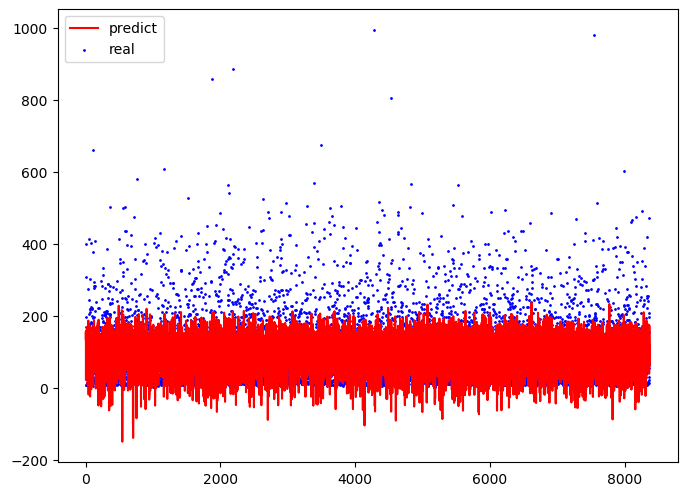

In [57]:
plt.rcParams['savefig.dpi']=300 #像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.rcParams['figure.figsize']=(8.0,6.0)
plt.figure()
plt.scatter(list(range(len(y_pre))),test_y,label='real',color='b',s=1)
plt.plot(list(range(len(y_pre))),y_pre,label='predict',color='r')
plt.legend()
plt.show()


In [63]:
#XGBRegressor
from xgboost import XGBRegressor
xgb=XGBRegressor(max_depth=4,n_estimators=301,learning_rate=0.25)
xgb.fit(train_x,train_y)
xgb.score(train_x,train_y)


0.5684883868062519

In [64]:
xgb.score(test_x,test_y)

0.43387981189740277

In [67]:
y_ha=xgb.predict(train_x)
MSEx = metrics.mean_squared_error(train_y, y_ha)

In [68]:
MSEx

3607.232806164904

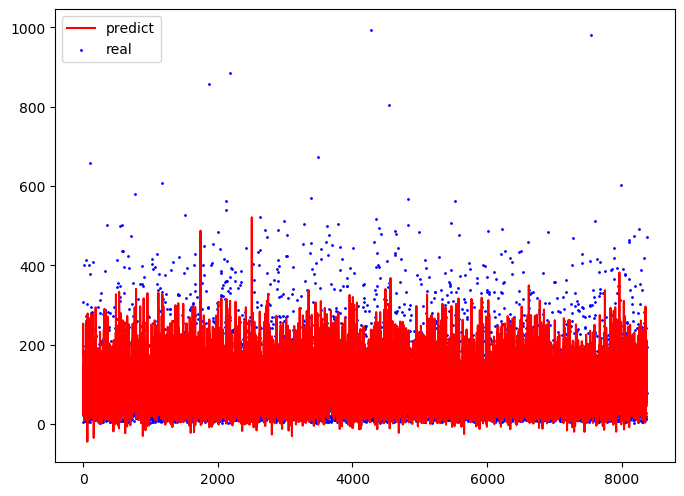

In [66]:
y_pre=xgb.predict(test_x)
plt.rcParams['savefig.dpi']=300 
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['figure.figsize']=(8.0,6.0)
plt.figure()
plt.scatter(list(range(len(y_pre))),test_y,label='real',color='b',s=1)
plt.plot(list(range(len(y_pre))),y_pre,label='predict',color='r')
plt.legend()
plt.show()
